In [1]:
.import numpy 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

In [2]:
import os
from PIL import Image
import numpy as np

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            # Open the image file
            img = Image.open(img_path)
            # Convert the image to numpy array
            img_array = np.array(img)
            # Append the image array to the list
            images.append(img_array)
    return images

# Path to the folder containing images
folder_path = r"D:\Malathi\DL_Project\content\Images"

# Load images from the folder
images = load_images_from_folder(folder_path)


In [3]:
for i, img_array in enumerate(images):
    print(f"Shape of image {i+1}: {img_array.shape}")

Shape of image 1: (500, 375, 3)
Shape of image 2: (375, 500, 3)
Shape of image 3: (400, 500, 3)
Shape of image 4: (410, 500, 3)
Shape of image 5: (461, 500, 3)
Shape of image 6: (333, 500, 3)
Shape of image 7: (333, 500, 3)
Shape of image 8: (334, 500, 3)
Shape of image 9: (375, 500, 3)
Shape of image 10: (375, 500, 3)
Shape of image 11: (429, 500, 3)
Shape of image 12: (357, 500, 3)
Shape of image 13: (500, 333, 3)
Shape of image 14: (487, 500, 3)
Shape of image 15: (334, 500, 3)
Shape of image 16: (303, 500, 3)
Shape of image 17: (375, 500, 3)
Shape of image 18: (375, 500, 3)
Shape of image 19: (281, 500, 3)
Shape of image 20: (198, 500, 3)
Shape of image 21: (333, 500, 3)
Shape of image 22: (500, 333, 3)
Shape of image 23: (333, 500, 3)
Shape of image 24: (292, 500, 3)
Shape of image 25: (375, 500, 3)
Shape of image 26: (375, 500, 3)
Shape of image 27: (500, 375, 3)
Shape of image 28: (215, 500, 3)
Shape of image 29: (375, 500, 3)
Shape of image 30: (500, 375, 3)
Shape of image 31: 

In [4]:
import cv2
import numpy as np

# Define the target size for resizing
target_size = (50, 50)  # Specify the desired width and height

# Create a list to store the resized images
resized_images = []

# Resize each image in the images array
for img in images:
    # Convert the numpy array to a BGR image
    bgr_image = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    # Resize the image
    resized_image = cv2.resize(bgr_image, target_size, interpolation=cv2.INTER_AREA)
    
    # Convert the BGR image back to RGB and append it to the resized_images list
    resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    resized_images.append(resized_image_rgb)

# Convert the resized_images list to a numpy array
resized_images_array = np.array(resized_images)

# Display the shape of the resized images array
print("Resized images shape:", resized_images_array.shape)


Resized images shape: (8091, 50, 50)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(resized_images_array, test_size=2000, random_state=42)

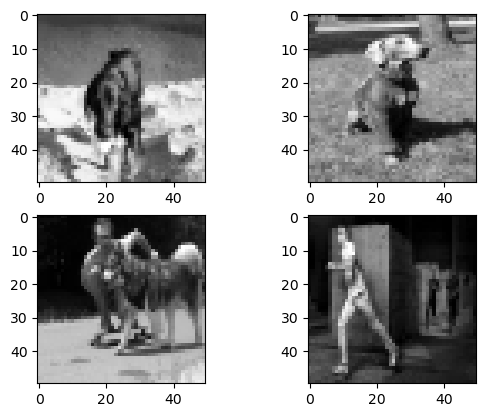

In [6]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [7]:
X_train = np.array(X_train)
X_test = np.array(X_test)
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train.shape

(6091, 2500)

In [9]:
X_test.shape

(2000, 2500)

In [10]:
noise_factor = 0.02
x_train_noisy = X_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

In [11]:
# create model
model = Sequential()
model.add(Dense(1000, input_dim=num_pixels, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(2500, activation='sigmoid'))

In [12]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
# Training model
model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=50, batch_size=100)

Epoch 1/50
61/61 [==============================] - 3s 56ms/step - loss: 0.0542 - val_loss: 0.0461
Epoch 2/50
61/61 [==============================] - 3s 53ms/step - loss: 0.0426 - val_loss: 0.0398
Epoch 3/50
61/61 [==============================] - 3s 53ms/step - loss: 0.0319 - val_loss: 0.0292
Epoch 4/50
61/61 [==============================] - 3s 53ms/step - loss: 0.0290 - val_loss: 0.0280
Epoch 5/50
61/61 [==============================] - 3s 54ms/step - loss: 0.0286 - val_loss: 0.0278
Epoch 6/50
61/61 [==============================] - 3s 54ms/step - loss: 0.0279 - val_loss: 0.0264
Epoch 7/50
61/61 [==============================] - 3s 54ms/step - loss: 0.0263 - val_loss: 0.0254
Epoch 8/50
61/61 [==============================] - 3s 54ms/step - loss: 0.0256 - val_loss: 0.0250
Epoch 9/50
61/61 [==============================] - 3s 54ms/step - loss: 0.0248 - val_loss: 0.0239
Epoch 10/50
61/61 [==============================] - 3s 55ms/step - loss: 0.0243 - val_loss: 0.0237
Epoch 11/

In [14]:
# Final evaluation of the model
model.save('my_100model.h5')
pred = model.predict(x_test_noisy)

In [15]:
pred.shape

(2000, 2500)

In [16]:
X_test.shape

(2000, 2500)

Test Images


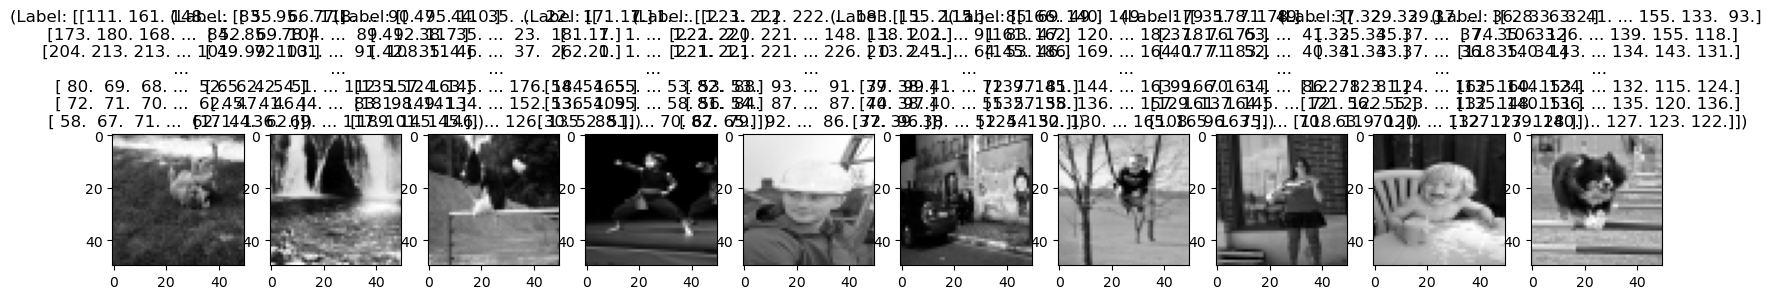

Test Images with Noise


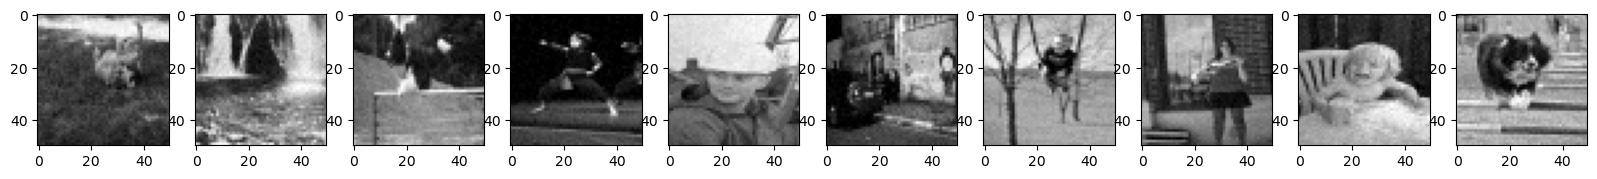

Reconstruction of Noisy Test Images


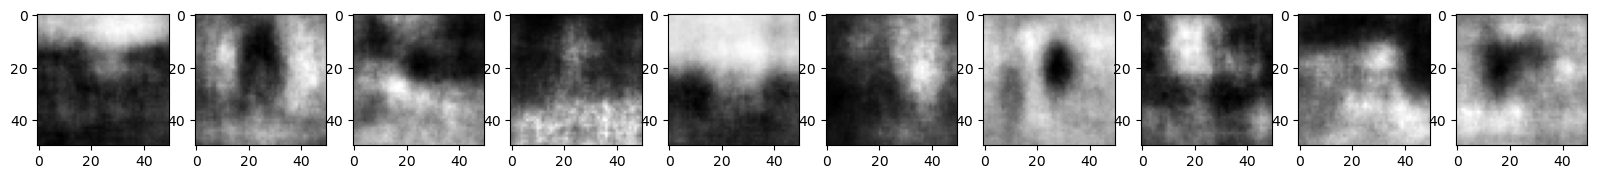

In [17]:
X_test = numpy.reshape(X_test, (2000,50,50)) *255
pred = numpy.reshape(pred, (2000,50, 50)) *255
x_test_noisy = numpy.reshape(x_test_noisy, (-1,50,50)) *255
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i,:,:], cmap='gray')
    curr_lbl = X_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()